In [612]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

In [613]:
datafile = '3-Airplane_Crashes_Since_1908.txt'
df = pd.read_table(datafile, sep=',', parse_dates=False)
df['Crash'] = 1
df.head()
# Parse in data

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Crash
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,0,"During a demonstration flight, a U.S. Army fly...",1
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,5,0,First U.S. dirigible Akron exploded just offsh...,1
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1,1,0,The first fatal airplane accident in Canada oc...,1
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,14,0,The airship flew into a thunderstorm and encou...,1
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30,30,0,Hydrogen gas which was being vented was sucked...,1


## A)
How many planes crashed yearly?
How many people were on board? 
How many survived? 
How many died?

In [614]:
def  toInt(x) :
    y = str(x)
    z = y[-4:]
    z = int(z)
    return z

df['Year'] = df['Date'].apply(toInt)
# Cast an integer (Year) from datetime (Date)

In [615]:
YearVsDeaths = df.groupby('Year').sum()
# Groupby Year to count crashes, aboard, fatalities

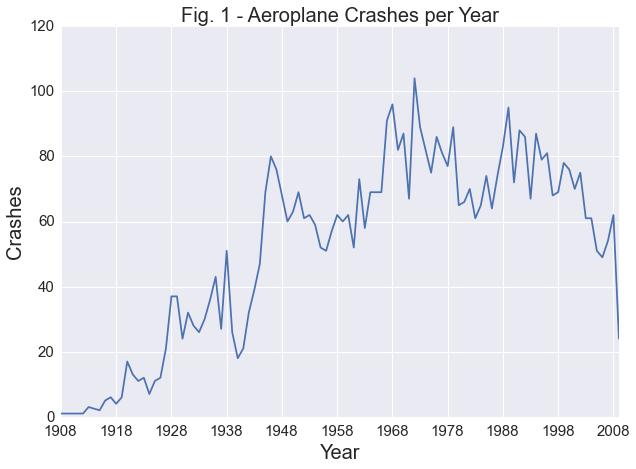

In [616]:
# Plot crashes per year
ax = YearVsDeaths['Crash'].plot(x_compat=True)
plt.xticks(np.arange(1908, 2009, 10))
ax.set_ylabel('Crashes', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.set_title('Fig. 1 - Aeroplane Crashes per Year', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

We can see through the noise, a rise, peak and decline of crashes per year. Next we will try and fit the data to a curve.

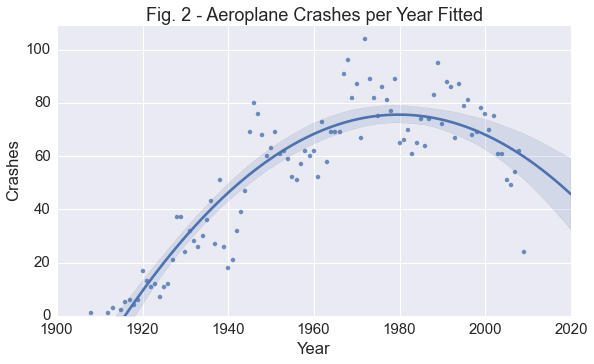

In [617]:
# Preliminary polynomial plot using Seaborn

YVD_ri = YearVsDeaths.reset_index()
YVD_max = YearVsDeaths.Crash.max()
ax = sns.lmplot(x='Year', y='Crash', data=YVD_ri, order=2, size=5, aspect=1.7)
#ax = sns.lmplot(YearVsDeaths, y='Crash', data=YearVsDeaths, order=2, size=5, aspect=1.7)
ax.set(xlabel='Year', ylabel='Crashes', ylim=(0, YVD_max+5), title='Fig. 2 - Aeroplane Crashes per Year Fitted')

A polynomial of order 2 seems to fit the data quite well, and supports the observation that crashes are becoming less frequent. 

In [618]:
# Explicit calculation of polynomial fit 

p1, res, _, _, _ = np.polyfit(YVD_ri['Year'], YVD_ri['Crash'], 2, full=True)
print 'Polynomial Coefficients (c2, c1, c0):', p1
print 'Standard Error:', np.sqrt(res/len(YVD_ri['Year']))

Polynomial Coefficients (c2, c1, c0): [ -1.85051922e-02   7.32737692e+01  -7.24586835e+04]
Standard Error: [ 11.63140027]


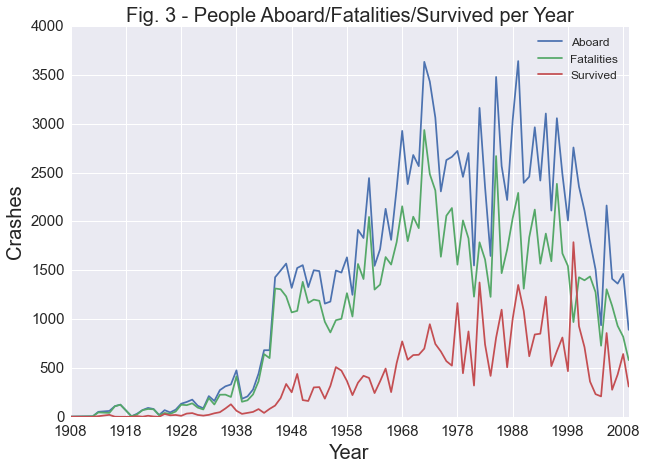

In [619]:
YearVsDeaths['Survived'] = YearVsDeaths['Aboard'] - YearVsDeaths['Fatalities']

ax = YearVsDeaths[['Aboard', 'Fatalities', 'Survived']].plot(x_compat=True)
plt.xticks(np.arange(1908, 2009, 10))
ax.set_ylabel('Crashes', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.set_title('Fig. 3 - People Aboard/Fatalities/Survived per Year', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.legend(prop={'size':12})

Fig. 3 shows that the number of people aboard, the fatalities and the survived are all following a similar pattern to crashes, which is unsurprising. An interesting quantity might be the survivability of crashes over time, i.e. the proportion of survivors among crash victims.

In [620]:
YearVsDeaths['PoS'] = YearVsDeaths['Survived']/YearVsDeaths['Aboard']
# Proportion of passengers surviving = Survivors / All aboard

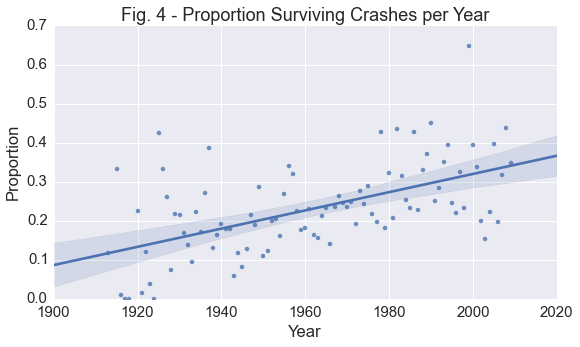

In [621]:
YearVsDeaths = YearVsDeaths[YearVsDeaths['Aboard'] > 10]
# Removing unrepresentative samples

YearVsDeaths = YearVsDeaths.reset_index()
sns.set(font_scale=1.5)

# Linear Regression to see line of best fit for proportion surviving vs time
ax = sns.lmplot(x='Year', y='PoS', data=YearVsDeaths, palette="m", size=5, aspect=1.7)
ax.set(xlabel='Year', ylabel='Proportion', ylim=(0, 0.7), title='Fig. 4 - Proportion Surviving Crashes per Year')

It does seem that the proportion surviving is increasing over time.

In [622]:
# Explicit Linear Regression
from scipy.stats import *
slope, intercept, r_val, p_val, std_err = linregress(YearVsDeaths['Year'], YearVsDeaths['PoS'])
print 'y = c1*x + c0 (c1, c0):', slope, intercept
print 'R squared :', pow(r_val, 2)

y = c1*x + c0 (c1, c0): 0.00233755155474 -4.35460929945
R squared : 0.317641353029


## B)
Highest number of crashes by operator and type of aircrafts.

In [623]:
df.groupby('Operator').sum().head(10)

,Aboard,Fatalities,Ground,Crash,Year
Operator,,,,,
A B Aerotransport,17,3,0,2,3868
AB Aerotransport,64,58,0,3,5837
ACES Colombia,41,40,0,3,5963
ADC Airlines,160,97,0,2,4003
ADES Colombia,23,22,0,2,3986
AECA Cargo,4,4,49,1,1984
AIDA,16,14,0,1,1956
AIRES Colombia,27,27,0,2,3980
ALADA,16,16,0,1,1997


Need to remove duplicate strings (Operator)

Still some problems, AVIANCA != AVIANCA/AVIANCA and ATI != ATI Aircompany

In [624]:
import string
 
def normalize(s):
    s = str(s)
    for p in string.punctuation:
        s = s.replace(p, '')
        s = s.replace(' ','')
    return s.lower().strip()

df['Operator (N)'] = df['Operator'].apply(normalize)
operator_df = df.groupby('Operator (N)').sum()
sorted_df = operator_df.sort('Crash', ascending=False)
sorted_df = sorted_df[:10]
sorted_df
# Grouped by operator, sorted by highest number of crashes

,Aboard,Fatalities,Ground,Crash,Year
Operator (N),,,,,
aeroflot,8870,7156,28,179,353702
militaryusairforce,4549,3763,178,178,350323
airfrance,2874,1734,5,70,136651
deutschelufthansa,510,396,0,65,125836
militaryroyalairforce,1086,1049,2,58,113327
airtaxi,197,182,0,48,95271
chinanationalaviationcorporation,374,409,4,44,85457
unitedairlines,2460,1021,2753,44,86127
militaryusarmyairforces,1100,1070,80,43,83610


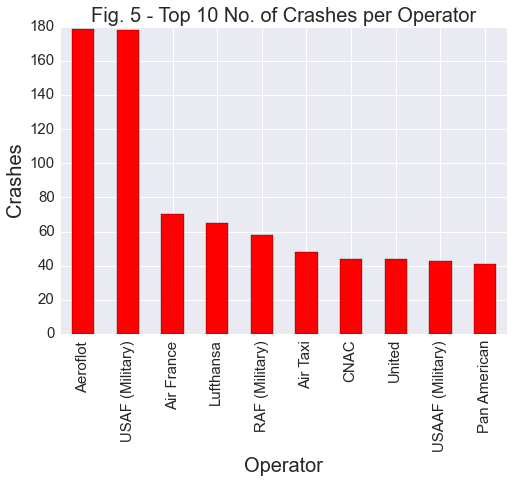

In [625]:

ax = sorted_df['Crash'].plot(kind='bar', color='r')
ax.set_xticklabels(['Aeroflot', 'USAF (Military)', 'Air France', 'Lufthansa',
                    'RAF (Military)','Air Taxi', 'CNAC', 'United','USAAF (Military)', 'Pan American'])
ax.set_ylabel('Crashes', fontsize=20)
ax.set_xlabel('Operator', fontsize=20)
ax.set_title('Fig. 5 - Top 10 No. of Crashes per Operator', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

Fig. 5 shows that Aeroflot and the US Air Force are far ahead of the pack, but since the data we have is purely crashes, we cannot say what the most dangerous operator is (crashes per flight).

In [637]:
df['Type (N)'] = df['Type'].apply(normalize)
sorted_type_df = df.groupby('Type (N)').sum().sort('Crash', ascending=False)
sorted_type_df = sorted_type_df[:10]
sorted_type_df

,Aboard,Fatalities,Ground,Crash,Year
Type (N),,,,,
douglasdc3,6128,4793,17,334,653598
dehavillandcanadadhc6twinotter300,1133,796,0,81,161171
douglasc47a,657,609,0,74,144990
douglasc47,1118,1046,0,62,121342
douglasdc4,1195,930,0,40,78405
antonovan26,1176,1081,43,38,75647
yakovlevyak40,1131,839,4,38,75499
junkersju523m,426,297,0,38,73821
dehavillanddh4,29,28,0,29,55712


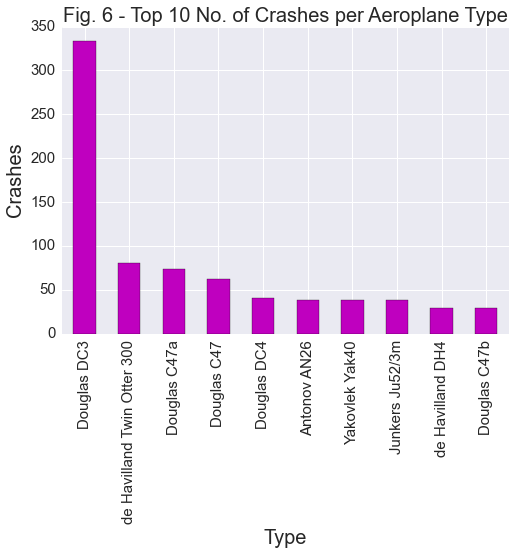

In [628]:
ax = sorted_type_df['Crash'].plot(kind='bar', color='m')
ax.set_xticklabels(['Douglas DC3', 'de Havilland Twin Otter 300', 'Douglas C47a', 'Douglas C47',
                    'Douglas DC4','Antonov AN26', 'Yakovlek Yak40', 'Junkers Ju52/3m','de Havilland DH4', 'Douglas C47b'])
ax.set_ylabel('Crashes', fontsize=20)
ax.set_xlabel('Type', fontsize=20)
ax.set_title('Fig. 6 - Top 10 No. of Crashes per Aeroplane Type', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

The Douglas DC3 is far ahead in terms of crashes, but it should be noted that this design is regarded as: 

>"...reliable, easy to maintain and carried passengers in greater comfort. Before the war it pioneered many air travel routes. It was able to cross the continental United States, making transcontinental flights and worldwide flights possible, and is considered to be the first airliner that could make money by carrying passengers alone." 

The number of crashes may be due to the fact that it was an early pioneer of commercial air travel, when air safety was not as developed, and the sheer number of flights it made.
https://en.wikipedia.org/wiki/Douglas_DC-3

## C)

‘Summary’ field has the details about the crashes. Find the reasons of the crash and categorize them in different clusters i.e Fire, shot down, weather (for the ‘Blanks’ in the data category can be UNKNOWN) you are open to make clusters of your choice but they should not exceed 7.

In [629]:
import re
# Crude attempt to read summaries, topmost regex searches are assumed most informative words.

def categorizer(str1) :
    str1 = str(str1)
    str1 = str1.lower()
 
# Unknown
    if str1 == '' :
        return 'Unknown'
    match = re.search(r'unknown', str1)
    if match:                      
        return 'Unknown'
    match = re.search(r'not determined', str1)
    if match:                      
        return 'Unknown'      
# Shot Down
    match = re.search(r'shot down', str1)
    if match:                      
        return 'Shot Down'
# Fire
    match = re.search(r'fire', str1)
    if match:                      
        return 'Fire'
# Weather
    match = re.search(r'fog', str1)
    if match:                      
        return 'Weather'
    match = re.search(r'snow', str1)
    if match:                      
        return 'Weather'
    match = re.search(r'storm', str1)
    if match:                      
        return 'Weather'
    match = re.search(r'wind', str1)
    if match:                      
        return 'Weather'
    match = re.search(r'turbulence', str1)
    if match:                      
        return 'Weather'
# Collision
    match = re.search(r'collision', str1)
    if match:                      
        return 'Collision'
    match = re.search(r'struck', str1)
    if match:                      
        return 'Collision'
# Failure (Aeroplane or pilot)
    match = re.search(r'quit', str1)
    if match:                      
        return 'Failure'
    match = re.search(r'failure', str1)
    if match:                      
        return 'Failure'
    match = re.search(r'broke', str1)
    if match:                      
        return 'Failure'
    match = re.search(r'sabotage', str1)
    if match:                      
        return 'Failure'
    match = re.search(r'stall', str1)
    if match:                      
        return 'Failure'
# Default
    return 'Unknown'

I have chosen six categories: 'Unknown', 'Shot Down', 'Fire', 'Weather', 'Failure', 'Collision'. Since a summary may contain more than one keyword (e.g. 'struck' in collision). I have tried to find most informative words first - i.e. if a crash summary contains 'shot down' and 'collision' we can say the cause is most likely being shot down, but it is not so clear-cut for other combinations.

In [630]:
df = df.replace({'Summary' : { np.nan : '' }})
# Insert empty strings for categorizer() to read empty entries as 'Unknown'

df['Cause'] = df['Summary'].apply(categorizer)
df[['Summary', 'Cause']].head(10)

,Summary,Cause
0,"During a demonstration flight, a U.S. Army fly...",Failure
1,First U.S. dirigible Akron exploded just offsh...,Unknown
2,The first fatal airplane accident in Canada oc...,Weather
3,The airship flew into a thunderstorm and encou...,Weather
4,Hydrogen gas which was being vented was sucked...,Unknown
5,Crashed into trees while attempting to land af...,Shot Down
6,"Exploded and burned near Neuwerk Island, when...",Unknown
7,"Crashed near the Black Sea, cause unknown.",Unknown
8,Shot down by British aircraft crashing in flames.,Shot Down
9,Shot down in flames by the British 39th Home D...,Shot Down


## D)

Find the number of crashed aircraft and number of deaths against each category from above step.

In [631]:
crash_df = df.groupby('Cause').sum()
crash_df['Crash']

Cause
Collision     459
Failure       682
Fire          342
Shot Down     133
Unknown      2846
Weather       806
Name: Crash, dtype: int64

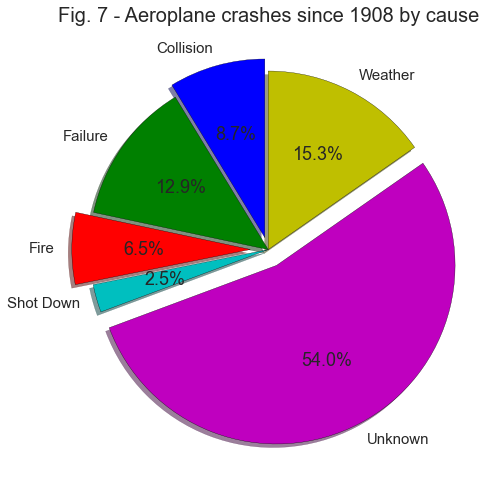

In [632]:
explode=(0.07, 0.0, 0.1, 0.0, 0.1, 0)

fig = plt.figure(1, figsize=(8,8))
ax = fig.add_subplot(111)

patches, texts, autotexts = ax.pie(crash_df['Crash'], explode=explode,
                                   labels=crash_df.index.values, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Fig. 7 - Aeroplane crashes since 1908 by cause', fontsize=20)
for i in texts :
    i.set_fontsize(15)

It is interesting to see how many crashes have unknown causes, more than half! Among the rest we see weather and failure are the two main causes.

In [633]:
crash_df['Fatalities']

Cause
Collision     9787
Failure      16657
Fire          9764
Shot Down     4500
Unknown      47237
Weather      17534
Name: Fatalities, dtype: float64

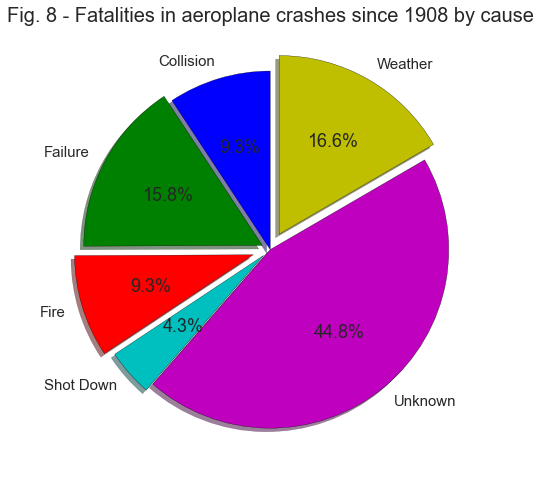

In [634]:
explode=(0, 0.05, 0.1, 0.05, 0, 0.1)

fig = plt.figure(1, figsize=(8,8))
ax = fig.add_subplot(111)

patches, texts, autotexts = ax.pie(crash_df['Fatalities'], explode=explode,
                                   labels=crash_df.index.values, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Fig. 8 - Fatalities in aeroplane crashes since 1908 by cause', fontsize=20)
for i in texts :
    i.set_fontsize(15)


We see again that weather and failure are the largest known causes. Next we can evaluate the deadliest causes, i.e. the fatalities per crash.

In [635]:
crash_df = crash_df.drop('Unknown')
crash_df['Fat. per Crash'] = crash_df['Fatalities'] / crash_df['Crash']
crash_df = crash_df.sort('Fat. per Crash', ascending=False)

crash_df.head()

,Aboard,Fatalities,Ground,Crash,Year,Fat. per Crash
Cause,,,,,,
Shot Down,4666,4500,0,133,262065,33.834586
Fire,15374,9764,292,342,675424,28.549708
Failure,22840,16657,365,682,1348129,24.423754
Weather,24640,17534,407,806,1589487,21.754342
Collision,12306,9787,306,459,905851,21.322440


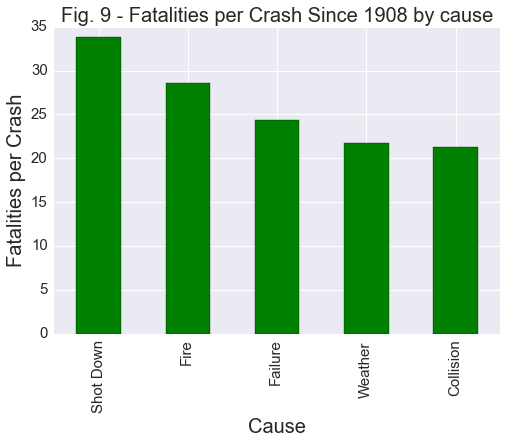

In [636]:

ax = crash_df['Fat. per Crash'].plot(kind='bar', color='g')
ax.set_xticklabels( crash_df.index.values)
ax.set_ylabel('Fatalities per Crash', fontsize=20)
ax.set_xlabel('Cause', fontsize=20)
ax.set_title('Fig. 9 - Fatalities per Crash Since 1908 by cause', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

 The deadliest kind of crash is being shot down, followed by a fire onboard.

## E)

Find any interesting trends/behaviors that you encounter when you analyze the dataset.

* Fig. 2 suggests that the number of crashes peaked around 1980, and has been falling ever since.

* Fig. 4 suggests that the proportion of people surviving crashes is increasing over time. 

* Fig. 9 shows that although 'Failure' and 'Weather' are the main causes of aeroplane crashes (Fig. 7), being shot down and having a fire onboard have more fatalities per crash.